# Query by example using nearest neighbors and mean average precision 
### George Tzanetakis, University of Victoria 

In this notebook we explore query-by-example using content-based audio features. The basic idea is that each track is represented as a feature vector. When looking for similar track to a query (what is called query-by-example or music similarity retrieval or personalized radio or playlist generation) we find the K (where K is the number of tracks we want returned) nearest neighbors in the feature space and return them. 


## Feature extraction

We can calculate a song-level timbral feature vector using the mean and standard deviation of Mel-Frequency Cepstral Coefficients (MFCCs) as well as using a tempogram a representation of energy of different tempo periodicities over time to calcuate a summary vector capturing some rhythmic aspects. Although a toy example 
this will allow us to explore query-by-example using different feature representations. 


In [1]:
import glob
import librosa
import numpy as np

fnames = glob.glob("/Users/georgetzanetakis/data/sound/genres/*/*.wav")

genres = ['classical', 'country', 'disco', 'hiphop', 'jazz', 'rock', 'blues', 'reggae', 'pop', 'metal']

# allocate matrix for audio features and target 
audio_features = np.zeros((len(fnames), 78))
target = np.zeros(len(fnames))
# compute the features 
for (i,fname) in enumerate(fnames): 
    print("Processing %d %s" % (i, fname))
    for (label,genre) in enumerate(genres): 
        if genre in fname: 
            audio, srate = librosa.load(fname)
            mfcc_matrix = librosa.feature.mfcc(y=audio, sr=srate)
            tempogram = librosa.feature.tempogram(y=audio, sr=srate)
            mean_tempogram = np.mean(tempogram, axis=1)[:-4]
            tempogram_features = np.sum(mean_tempogram.reshape(-1, 10), axis=1)
            mean_mfcc = np.mean(mfcc_matrix,axis=1)
            std_mfcc = np.std(mfcc_matrix, axis=1)
            audio_fvec = np.hstack([mean_mfcc, std_mfcc, tempogram_features])
            audio_features[i] = audio_fvec
            target[i] = label
print(audio_features.shape)



Processing 0 /Users/georgetzanetakis/data/sound/genres/pop/pop.00027.wav
Processing 1 /Users/georgetzanetakis/data/sound/genres/pop/pop.00033.wav
Processing 2 /Users/georgetzanetakis/data/sound/genres/pop/pop.00032.wav
Processing 3 /Users/georgetzanetakis/data/sound/genres/pop/pop.00026.wav
Processing 4 /Users/georgetzanetakis/data/sound/genres/pop/pop.00030.wav
Processing 5 /Users/georgetzanetakis/data/sound/genres/pop/pop.00024.wav
Processing 6 /Users/georgetzanetakis/data/sound/genres/pop/pop.00018.wav
Processing 7 /Users/georgetzanetakis/data/sound/genres/pop/pop.00019.wav
Processing 8 /Users/georgetzanetakis/data/sound/genres/pop/pop.00025.wav
Processing 9 /Users/georgetzanetakis/data/sound/genres/pop/pop.00031.wav
Processing 10 /Users/georgetzanetakis/data/sound/genres/pop/pop.00009.wav
Processing 11 /Users/georgetzanetakis/data/sound/genres/pop/pop.00035.wav
Processing 12 /Users/georgetzanetakis/data/sound/genres/pop/pop.00021.wav
Processing 13 /Users/georgetzanetakis/data/sound

Processing 111 /Users/georgetzanetakis/data/sound/genres/metal/metal.00024.wav
Processing 112 /Users/georgetzanetakis/data/sound/genres/metal/metal.00018.wav
Processing 113 /Users/georgetzanetakis/data/sound/genres/metal/metal.00019.wav
Processing 114 /Users/georgetzanetakis/data/sound/genres/metal/metal.00025.wav
Processing 115 /Users/georgetzanetakis/data/sound/genres/metal/metal.00031.wav
Processing 116 /Users/georgetzanetakis/data/sound/genres/metal/metal.00027.wav
Processing 117 /Users/georgetzanetakis/data/sound/genres/metal/metal.00033.wav
Processing 118 /Users/georgetzanetakis/data/sound/genres/metal/metal.00032.wav
Processing 119 /Users/georgetzanetakis/data/sound/genres/metal/metal.00026.wav
Processing 120 /Users/georgetzanetakis/data/sound/genres/metal/metal.00082.wav
Processing 121 /Users/georgetzanetakis/data/sound/genres/metal/metal.00096.wav
Processing 122 /Users/georgetzanetakis/data/sound/genres/metal/metal.00069.wav
Processing 123 /Users/georgetzanetakis/data/sound/ge

Processing 215 /Users/georgetzanetakis/data/sound/genres/disco/disco.00078.wav
Processing 216 /Users/georgetzanetakis/data/sound/genres/disco/disco.00050.wav
Processing 217 /Users/georgetzanetakis/data/sound/genres/disco/disco.00044.wav
Processing 218 /Users/georgetzanetakis/data/sound/genres/disco/disco.00068.wav
Processing 219 /Users/georgetzanetakis/data/sound/genres/disco/disco.00040.wav
Processing 220 /Users/georgetzanetakis/data/sound/genres/disco/disco.00054.wav
Processing 221 /Users/georgetzanetakis/data/sound/genres/disco/disco.00083.wav
Processing 222 /Users/georgetzanetakis/data/sound/genres/disco/disco.00097.wav
Processing 223 /Users/georgetzanetakis/data/sound/genres/disco/disco.00096.wav
Processing 224 /Users/georgetzanetakis/data/sound/genres/disco/disco.00082.wav
Processing 225 /Users/georgetzanetakis/data/sound/genres/disco/disco.00055.wav
Processing 226 /Users/georgetzanetakis/data/sound/genres/disco/disco.00041.wav
Processing 227 /Users/georgetzanetakis/data/sound/ge

Processing 320 /Users/georgetzanetakis/data/sound/genres/blues/blues.00042.wav
Processing 321 /Users/georgetzanetakis/data/sound/genres/blues/blues.00056.wav
Processing 322 /Users/georgetzanetakis/data/sound/genres/blues/blues.00057.wav
Processing 323 /Users/georgetzanetakis/data/sound/genres/blues/blues.00043.wav
Processing 324 /Users/georgetzanetakis/data/sound/genres/blues/blues.00094.wav
Processing 325 /Users/georgetzanetakis/data/sound/genres/blues/blues.00080.wav
Processing 326 /Users/georgetzanetakis/data/sound/genres/blues/blues.00096.wav
Processing 327 /Users/georgetzanetakis/data/sound/genres/blues/blues.00082.wav
Processing 328 /Users/georgetzanetakis/data/sound/genres/blues/blues.00069.wav
Processing 329 /Users/georgetzanetakis/data/sound/genres/blues/blues.00055.wav
Processing 330 /Users/georgetzanetakis/data/sound/genres/blues/blues.00041.wav
Processing 331 /Users/georgetzanetakis/data/sound/genres/blues/blues.00040.wav
Processing 332 /Users/georgetzanetakis/data/sound/ge

Processing 425 /Users/georgetzanetakis/data/sound/genres/reggae/reggae.00078.wav
Processing 426 /Users/georgetzanetakis/data/sound/genres/reggae/reggae.00087.wav
Processing 427 /Users/georgetzanetakis/data/sound/genres/reggae/reggae.00093.wav
Processing 428 /Users/georgetzanetakis/data/sound/genres/reggae/reggae.00085.wav
Processing 429 /Users/georgetzanetakis/data/sound/genres/reggae/reggae.00091.wav
Processing 430 /Users/georgetzanetakis/data/sound/genres/reggae/reggae.00046.wav
Processing 431 /Users/georgetzanetakis/data/sound/genres/reggae/reggae.00052.wav
Processing 432 /Users/georgetzanetakis/data/sound/genres/reggae/reggae.00053.wav
Processing 433 /Users/georgetzanetakis/data/sound/genres/reggae/reggae.00047.wav
Processing 434 /Users/georgetzanetakis/data/sound/genres/reggae/reggae.00090.wav
Processing 435 /Users/georgetzanetakis/data/sound/genres/reggae/reggae.00084.wav
Processing 436 /Users/georgetzanetakis/data/sound/genres/reggae/reggae.00020.wav
Processing 437 /Users/george

Processing 526 /Users/georgetzanetakis/data/sound/genres/classical/classical.00040.wav
Processing 527 /Users/georgetzanetakis/data/sound/genres/classical/classical.00054.wav
Processing 528 /Users/georgetzanetakis/data/sound/genres/classical/classical.00068.wav
Processing 529 /Users/georgetzanetakis/data/sound/genres/classical/classical.00083.wav
Processing 530 /Users/georgetzanetakis/data/sound/genres/classical/classical.00097.wav
Processing 531 /Users/georgetzanetakis/data/sound/genres/classical/classical.00096.wav
Processing 532 /Users/georgetzanetakis/data/sound/genres/classical/classical.00082.wav
Processing 533 /Users/georgetzanetakis/data/sound/genres/classical/classical.00069.wav
Processing 534 /Users/georgetzanetakis/data/sound/genres/classical/classical.00055.wav
Processing 535 /Users/georgetzanetakis/data/sound/genres/classical/classical.00041.wav
Processing 536 /Users/georgetzanetakis/data/sound/genres/classical/classical.00026.wav
Processing 537 /Users/georgetzanetakis/data

Processing 623 /Users/georgetzanetakis/data/sound/genres/rock/rock.00067.wav
Processing 624 /Users/georgetzanetakis/data/sound/genres/rock/rock.00073.wav
Processing 625 /Users/georgetzanetakis/data/sound/genres/rock/rock.00098.wav
Processing 626 /Users/georgetzanetakis/data/sound/genres/rock/rock.00065.wav
Processing 627 /Users/georgetzanetakis/data/sound/genres/rock/rock.00071.wav
Processing 628 /Users/georgetzanetakis/data/sound/genres/rock/rock.00059.wav
Processing 629 /Users/georgetzanetakis/data/sound/genres/rock/rock.00058.wav
Processing 630 /Users/georgetzanetakis/data/sound/genres/rock/rock.00070.wav
Processing 631 /Users/georgetzanetakis/data/sound/genres/rock/rock.00064.wav
Processing 632 /Users/georgetzanetakis/data/sound/genres/rock/rock.00048.wav
Processing 633 /Users/georgetzanetakis/data/sound/genres/rock/rock.00060.wav
Processing 634 /Users/georgetzanetakis/data/sound/genres/rock/rock.00074.wav
Processing 635 /Users/georgetzanetakis/data/sound/genres/rock/rock.00075.wav

Processing 729 /Users/georgetzanetakis/data/sound/genres/hiphop/hiphop.00068.wav
Processing 730 /Users/georgetzanetakis/data/sound/genres/hiphop/hiphop.00056.wav
Processing 731 /Users/georgetzanetakis/data/sound/genres/hiphop/hiphop.00042.wav
Processing 732 /Users/georgetzanetakis/data/sound/genres/hiphop/hiphop.00095.wav
Processing 733 /Users/georgetzanetakis/data/sound/genres/hiphop/hiphop.00081.wav
Processing 734 /Users/georgetzanetakis/data/sound/genres/hiphop/hiphop.00080.wav
Processing 735 /Users/georgetzanetakis/data/sound/genres/hiphop/hiphop.00094.wav
Processing 736 /Users/georgetzanetakis/data/sound/genres/hiphop/hiphop.00043.wav
Processing 737 /Users/georgetzanetakis/data/sound/genres/hiphop/hiphop.00057.wav
Processing 738 /Users/georgetzanetakis/data/sound/genres/hiphop/hiphop.00053.wav
Processing 739 /Users/georgetzanetakis/data/sound/genres/hiphop/hiphop.00047.wav
Processing 740 /Users/georgetzanetakis/data/sound/genres/hiphop/hiphop.00090.wav
Processing 741 /Users/george

Processing 830 /Users/georgetzanetakis/data/sound/genres/country/country.00017.wav
Processing 831 /Users/georgetzanetakis/data/sound/genres/country/country.00003.wav
Processing 832 /Users/georgetzanetakis/data/sound/genres/country/country.00002.wav
Processing 833 /Users/georgetzanetakis/data/sound/genres/country/country.00016.wav
Processing 834 /Users/georgetzanetakis/data/sound/genres/country/country.00012.wav
Processing 835 /Users/georgetzanetakis/data/sound/genres/country/country.00006.wav
Processing 836 /Users/georgetzanetakis/data/sound/genres/country/country.00007.wav
Processing 837 /Users/georgetzanetakis/data/sound/genres/country/country.00013.wav
Processing 838 /Users/georgetzanetakis/data/sound/genres/country/country.00005.wav
Processing 839 /Users/georgetzanetakis/data/sound/genres/country/country.00011.wav
Processing 840 /Users/georgetzanetakis/data/sound/genres/country/country.00039.wav
Processing 841 /Users/georgetzanetakis/data/sound/genres/country/country.00038.wav
Proc

Processing 932 /Users/georgetzanetakis/data/sound/genres/jazz/jazz.00067.wav
Processing 933 /Users/georgetzanetakis/data/sound/genres/jazz/jazz.00073.wav
Processing 934 /Users/georgetzanetakis/data/sound/genres/jazz/jazz.00098.wav
Processing 935 /Users/georgetzanetakis/data/sound/genres/jazz/jazz.00099.wav
Processing 936 /Users/georgetzanetakis/data/sound/genres/jazz/jazz.00072.wav
Processing 937 /Users/georgetzanetakis/data/sound/genres/jazz/jazz.00066.wav
Processing 938 /Users/georgetzanetakis/data/sound/genres/jazz/jazz.00058.wav
Processing 939 /Users/georgetzanetakis/data/sound/genres/jazz/jazz.00070.wav
Processing 940 /Users/georgetzanetakis/data/sound/genres/jazz/jazz.00064.wav
Processing 941 /Users/georgetzanetakis/data/sound/genres/jazz/jazz.00065.wav
Processing 942 /Users/georgetzanetakis/data/sound/genres/jazz/jazz.00071.wav
Processing 943 /Users/georgetzanetakis/data/sound/genres/jazz/jazz.00059.wav
Processing 944 /Users/georgetzanetakis/data/sound/genres/jazz/jazz.00054.wav

## Assemble dataframe with features and labels and write to .csv file 

In [2]:
import pandas as pd 

mfcc_names = [] 
for k in range(0,20): 
    mfcc_names.append('mean_mfcc_' + str(k))
for k in range(0,20): 
    mfcc_names.append('std_mfcc_' + str(k))
tempogram_features_names = [] 
for k in range(0,38): 
    tempogram_features_names.append('tempogram_feature_' + str(k))
columns = mfcc_names + tempogram_features_names
genres_pdf = pd.DataFrame(data=audio_features, index=None, columns = columns)
genres_pdf['genre_id'] = target
genres_pdf['genre'] = genres_pdf['genre_id'].apply(lambda x: genres[int(x)])
genres_pdf['fname'] = fnames

genres_pdf.to_csv('GTZAN_summary_mfcc_genres.csv',index=False)
genres_pdf = pd.read_csv('GTZAN_summary_mfcc_genres.csv')
genres_pdf

mean_mfcc_0  mean_mfcc_1  mean_mfcc_2  mean_mfcc_3  mean_mfcc_4  \
0     -75.310120    83.352333    10.692239    14.464298    14.244169   
1     -68.928207    73.759949   -12.472088     9.549265    -0.037815   
2    -113.112213    41.596046    21.518061    11.100334    17.437881   
3     -73.322212    97.488853    16.858400    -0.587017     7.188521   
4     -18.115849    72.282204    -4.890481    -0.378657     1.685867   
..           ...          ...          ...          ...          ...   
995  -192.072937   105.570137   -26.020508    40.166473    -6.661609   
996  -305.444885   121.933464     2.606408    36.942242    -8.558879   
997  -414.035278   104.864693    -7.839935    37.852409     0.176041   
998  -262.060669   108.989754    -6.337936    55.166401   -10.659160   
999  -261.820526   139.550018   -17.106533    49.890312    -5.859791   

     mean_mfcc_5  mean_mfcc_6  mean_mfcc_7  mean_mfcc_8  mean_mfcc_9  ...  \
0       7.392612     5.275317    -0.394537     5.729705     3.368037  ...   
1      12.726260     3.162044    -0.072350     2.534841     2.882886  ...   
2       0.610943     3.028697     0.086027     3.453745     0.289805  ...   
3       4.874156     0.759747    -5.546975     1.001608     4.935908  ...   
4      -0.925050    -1.330335    -0.343852     0.651997    -0.186307  ...   
..           ...          ...          ...          ...          ...  ...   
995    26.503607   -10.378772    18.473543   -14.002913    14.932205  ...   
996    17.920361    -9.269381    10.571828    -9.929619     2.325254  ...   
997    23.409214    -7.302678     5.758042    -1.056865     8.495793  ...   
998    18.519104    -4.244628    18.544847   -19.702841    17.573423  ...   
999    19.839077     1.865228     5.707028    -7.827316    -0.433149  ...   

     tempogram_feature_31  tempogram_feature_32  tempogram_feature_33  \
0                0.004250              0.002387              0.001103   
1                0.006103              0.002983              0.001125   
2                0.005658              0.002465              0.000794   
3                0.004656              0.002471              0.000933   
4                0.007069              0.003154              0.001071   
..                    ...                   ...                   ...   
995              0.010820              0.004980              0.002039   
996              0.004013              0.001998              0.000761   
997              0.008370              0.004024              0.001626   
998              0.007833              0.003604              0.001461   
999              0.005531              0.002787              0.001007   

     tempogram_feature_34  tempogram_feature_35  tempogram_feature_36  \
0                0.000261              0.000074              0.000012   
1                0.000379              0.000096              0.000013   
2                0.000347              0.000082              0.000010   
3                0.000366              0.000073              0.000010   
4                0.000444              0.000107              0.000013   
..                    ...                   ...                   ...   
995              0.000690              0.000167              0.000023   
996              0.000246              0.000063              0.000009   
997              0.000530              0.000126              0.000018   
998              0.000487              0.000117              0.000016   
999              0.000343              0.000092              0.000011   

     tempogram_feature_37  genre_id  genre  \
0            4.069199e-07       8.0    pop   
1            5.977921e-07       8.0    pop   
2            3.643084e-07       8.0    pop   
3            4.812994e-07       8.0    pop   
4            5.173409e-07       8.0    pop   
..                    ...       ...    ...   
995          1.016601e-06       4.0   jazz   
996          3.561717e-07       4.0   jazz   
997          8.005311e-07       4.0   jazz   
9

In [4]:
# check that the dimension of the feature matrices and target labels are correct 

mfcc_features = genres_pdf[mfcc_names].values
target = genres_pdf['genre_id']
rhythm_features = genres_pdf[tempogram_features_names].values
print(mfcc_features.shape)
print(rhythm_features.shape)
audio_features = np.hstack([mfcc_features, rhythm_features])
print(audio_features.shape)
print(target.shape)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

mfcc_features = scaler.fit_transform(mfcc_features)
rhythm_features = scaler.fit_transform(rhythm_features)
audio_features = scaler.fit_transform(audio_features)

(1000, 40)
(1000, 38)
(1000, 78)
(1000,)


## Classification 

Let's look at the classification accuracy and confusion matrix of the MFCC-based feature vector and the tempogram-based feature vector. 

In [6]:
from sklearn import svm, metrics
from sklearn.model_selection import cross_val_predict

clf_all = svm.SVC(gamma='scale', kernel='linear')
clf_all.fit(audio_features, target)
predicted = cross_val_predict(clf_all, audio_features, target, cv=10)

print("Confusion matrix:\n%s" % metrics.confusion_matrix(target, predicted))
print("Accuray :\n%s\n"
      % (metrics.accuracy_score(target, predicted)))

Confusion matrix:
[[95  2  0  0  2  1  0  0  0  0]
 [ 0 55  6  0  4 14 11  6  3  1]
 [ 1  5 55  9  1 11  4  5  8  1]
 [ 0  3  6 59  0  2  0 19  4  7]
 [ 5  3  4  1 83  0  2  2  0  0]
 [ 1 12 13  2  9 36 11  4  1 11]
 [ 0  9  3  1  6 10 50 10  0 11]
 [ 0  4  6 12  2  5  6 60  4  1]
 [ 2  4  6  3  0  2  0  4 79  0]
 [ 0  0  3  5  0  8  3  0  0 81]]
Accuray :
0.653



In [8]:
print(mfcc_features.shape)
clf_mfcc = svm.SVC(gamma='scale', kernel='linear')
clf_mfcc.fit(mfcc_features, target)
predicted = cross_val_predict(clf_mfcc, mfcc_features, target, cv=10)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(target, predicted))
print("Accuray :\n%s\n"
      % (metrics.accuracy_score(target, predicted)))


(1000, 40)
Confusion matrix:
[[91  2  0  0  5  2  0  0  0  0]
 [ 1 49 12  0  2 14 12  5  4  1]
 [ 1  5 45 11  0 16  3  3  9  7]
 [ 0  0 10 51  0  3  1 26  4  5]
 [ 3  4  2  0 85  1  4  1  0  0]
 [ 0  5 14  2  8 36 15  6  2 12]
 [ 0  9  2  1  7 11 50  6  0 14]
 [ 0  4  4 18  1  5  5 58  4  1]
 [ 0  3  2  5  0  3  1  4 82  0]
 [ 0  0  4  2  0  5  3  0  0 86]]
Accuray :
0.633



In [9]:
print(rhythm_features.shape)
clf_rhythm = svm.SVC(gamma='scale', kernel='linear')
clf_rhythm.fit(rhythm_features, target)
predicted = cross_val_predict(clf_rhythm, rhythm_features, target, cv=10)

print("Confusion matrix:\n%s" % metrics.confusion_matrix(target, predicted))
print("Accuray :\n%s\n"
      % (metrics.accuracy_score(target, predicted)))



(1000, 38)
Confusion matrix:
[[60 10  1  2  5  1  0  2  2 17]
 [ 5 39 10  7 16  0  0 14  2  7]
 [ 1 16 19  4  7  2  3 28 14  6]
 [ 0 11 19  8 10  2  3 23 13 11]
 [ 4 24  8  7 13  1  5 14  5 19]
 [ 8 17  5  3 10  3  3 23 10 18]
 [ 1 22  8  4 13  6  2 26  3 15]
 [ 0  8  8  3  1  0  2 69  7  2]
 [ 3  8 13  3  4  1  5 40 13 10]
 [31 11  5  0  8  4  1  2  4 34]]
Accuray :
0.26



In [10]:
from sklearn.neighbors import NearestNeighbors

def nn_names(features, query_index): 
    nbrs = NearestNeighbors(n_neighbors=5, algorithm='brute').fit(features)
    distances, indices = nbrs.kneighbors(features)
    retrieved = [genres_pdf['fname'][i]  for i in indices[query_index]]
    return retrieved 

print('QBE for MFCC features')
mfcc_retrieved = nn_names(mfcc_features, 200)
for n in mfcc_retrieved: 
    print(n[42:])

print('\n')

print('QBE for rhythm features') 
rhythm_retrieved = nn_names(rhythm_features, 200)
for n in rhythm_retrieved: 
    print(n[42:])

print('\n')
print('QBE for full audio feature vector')
audio_retrieved = nn_names(audio_features, 200)
for n in audio_retrieved: 
    print(n[42:])

QBE for MFCC features
disco/disco.00052.wav
country/country.00099.wav
blues/blues.00082.wav
blues/blues.00077.wav
disco/disco.00074.wav


QBE for rhythm features
disco/disco.00052.wav
jazz/jazz.00013.wav
jazz/jazz.00075.wav
hiphop/hiphop.00042.wav
rock/rock.00060.wav


QBE for full audio feature vector
disco/disco.00052.wav
disco/disco.00076.wav
blues/blues.00082.wav
rock/rock.00018.wav
rock/rock.00019.wav


We can listen to some example of the retrieved results for this query using the full audio feature vector and using only the rhythm-based features 

In [11]:
import IPython.display as ipd

print('QUERY: ', audio_retrieved[0])
audio, srate = librosa.load(audio_retrieved[0])
ipd.Audio(audio, rate =srate)

QUERY:  /Users/georgetzanetakis/data/sound/genres/disco/disco.00052.wav


In [12]:
print('RETRIEVED 1: ', audio_retrieved[1])
audio, srate = librosa.load(audio_retrieved[1])
ipd.Audio(audio, rate =srate)

RETRIEVED 1:  /Users/georgetzanetakis/data/sound/genres/disco/disco.00076.wav


In [13]:
print('RETRIEVED 2: ', audio_retrieved[2])
audio, srate = librosa.load(audio_retrieved[2])
ipd.Audio(audio, rate =srate)

RETRIEVED 2:  /Users/georgetzanetakis/data/sound/genres/blues/blues.00082.wav


In [14]:
import IPython.display as ipd

print('RHHYTHM RETRIEVAL 1: ', rhythm_retrieved[1])
audio, srate = librosa.load(rhythm_retrieved[1])
ipd.Audio(audio, rate =srate)

RHHYTHM RETRIEVAL 1:  /Users/georgetzanetakis/data/sound/genres/jazz/jazz.00013.wav


In [15]:
import IPython.display as ipd

print('RHHYTHM RETRIEVAL 2: ', rhythm_retrieved[2])
audio, srate = librosa.load(rhythm_retrieved[2])
ipd.Audio(audio, rate =srate)

RHHYTHM RETRIEVAL 2:  /Users/georgetzanetakis/data/sound/genres/jazz/jazz.00075.wav


## Mean Average Precision 

In order to measure the effectiveness of a query-by-example system a common approach is to use information retrieval metrics. The first step is given a list of retrieved items to determine which ones are relevant to the query. There are two main approaches to establishing relevance. The first approach, and probably the more valid one, is to ask humans through some form of user study which retrieved results are relevant to the query. The second approach is to use some proxy definition of relevance. For illustrating some of the metrics used to evaluate query-by-example we will use the genre labels as a proxy for relevance. In other words if the retrieved track is the same genre as the query we consider it relevant. There are cases in which a very reasonable match might be returned that a human would mark as relevant but because we use the genre as a proxy it will be marked as irrelevant. Let's see how this works. 


In [17]:


def average_precision(features, index, verbose=True): 
    results = nn_names(features, index)
    query = results[0] 
    query_genre = query[42:query.rfind('/')]

    
    precisions = np.zeros(len(results))
    relevant = np.zeros(len(results))
    num_relevant = 0 

    for (k,r) in enumerate(results): 
        if (k>0): 
            genre = r[42:query.rfind('/')]
            if (query_genre == genre):
                num_relevant +=  1
                relevant[k] = 1 
            precisions[k] = num_relevant / k

        
    precisions = precisions[1:]
    relevant = relevant[1:]
    average_precision = np.mean(precisions)

    if (verbose): 
        print('Query: ', results[0][42:])
        print('--------------------------------')

        for (r,p,result) in zip(relevant,precisions,results): 
            print('%2.2f \t %2.2f \t %s' % (r,p,result[42:]))

        print('Precisions', precisions)
        print('Relevant', relevant)
        print('Average precision for single query', average_precision)
        
    return average_precision
    
average_precision(audio_features, 200)

Query:  disco/disco.00052.wav
--------------------------------
1.00 	 1.00 	 disco/disco.00052.wav
0.00 	 0.50 	 disco/disco.00076.wav
0.00 	 0.33 	 blues/blues.00082.wav
0.00 	 0.25 	 rock/rock.00018.wav
Precisions [1.         0.5        0.33333333 0.25      ]
Relevant [1. 0. 0. 0.]
Average precision for single query 0.5208333333333333


0.5208333333333333

We can now calculate the average precision for returning 5 neighbors for different types 
of features for a particular query. We can then iterate over all queries and the resulting 
metric is called Mean Average Precision (MAP) 

In [19]:
average_precisions = [average_precision(audio_features, k, verbose=False) for k in range(0,1000)]
print('Average precision for first 10 queries', average_precisions[0:10])
print('Mean Average Precision %2.2f' % np.mean(average_precisions))

Average precision for first 10 queries [0.9375, 0.20833333333333331, 1.0, 0.8541666666666666, 0.5833333333333333, 0.8541666666666666, 0.8541666666666666, 0.2708333333333333, 0.9375, 0.6666666666666666]
Mean Average Precision 0.56


Calculating the mean average precision using the rhythm-features results in lower retrieval performance 

In [21]:
average_precisions = [average_precision(rhythm_features, k, verbose=False) for k in range(0,1000)]
print('Mean Average Precision %2.2f' % np.mean(average_precisions))

Mean Average Precision 0.24


Note that we have used matching genre labels as a proxy for relevance. A more accurate way would be to conduct some form of user study in which the listeners would evaluate each returned results and determine whether it is relevant or not to the query. 

## Manifold learning and embeddings 

Let's now look at embeddings which are lower dimensional representations of a feature space that are created using some form of either supervised or unsupervised learning. Supervised learning of embeddings can utilize a variety of constrains such as tracks in different genres should be further than tracks from the same genre as well as information about artists, listening patterns etc. 

Once the embedding is created and each track is mapped to a corresponding point then query-by-example can be performed in the new space. 



In [22]:

print(mfcc_features.shape)
X = mfcc_features
y = target 

(1000, 40)


In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt

colors = ['tab:orange', 'tab:green', 'tab:red', 
          'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']


target_names = ['classical', 'country', 'disco', 'hiphop', 'jazz', 'rock', 'blues', 'reggae', 'pop', 'metal']


def plot_scatter(X, y, title): 
    lw = 2
    #fig = plt.figure(1, figsize=(8, 6))
    for color, i, target_name in zip(colors, [0, 1, 2,4,5,6,7,8,9], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, 
                    lw=lw, label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)
    plt.show()

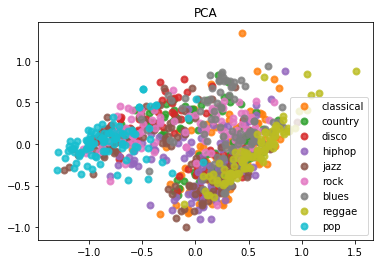

In [24]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 


# Two dimensional PCA 
X_pca = PCA(n_components=2).fit_transform(X)
plot_scatter(X_pca, y, 'PCA')

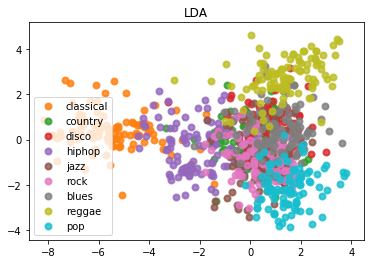

In [25]:
# Two dimensional LDA 
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X,y)
plot_scatter(X_lda, y, 'LDA')


(1000, 2)


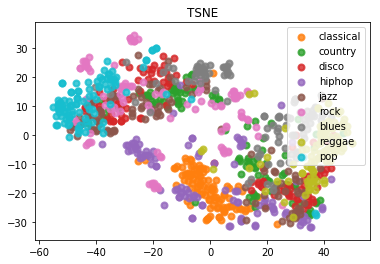

In [26]:
# 2D TSNE 
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
print(X_tsne.shape)
plot_scatter(X_tsne, y, 'TSNE')

Now lets look at how well these embeddings perform using a mean average precision 
analysis with the genre labels as a proxy to relevance. We will consider three 
manifold learning method: Principal Component analysis, Linear Discriminant Analysis, 
and t-SNE. PCA and t-SNE are unsupervised whereas LDA is supervised. 


In [27]:
def map_metric(X): 
    nbrs = NearestNeighbors(n_neighbors=5, algorithm='brute').fit(X)
    istances, indices = nbrs.kneighbors(X)
    average_precisions = [average_precision(indices, k, verbose=False) for k in range(0,1000)]
    return np.mean(average_precisions)

print('Mean Average Precision for original feature vector  %2.2f' % map_metric(X))
print('Mean Average Precision for PCA   %2.2f' % map_metric(X_pca))
print('Mean Average Precision for LDA   %2.2f' % map_metric(X_lda))
print('Mean Average Precision for t-SNE %2.2f' % map_metric(X_tsne))



Mean Average Precision for original feature vector  0.69
Mean Average Precision for PCA   0.46
Mean Average Precision for LDA   0.64
Mean Average Precision for t-SNE 0.70


This type of experimentation with different algorithms and representations is very common in academic research in Music Information Retrieval as well as other types of multimedia retrieval. 